In [ ]:
import pandas as pd
import numpy as np 
import math
from plotnine import *
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score 
from sklearn.impute import KNNImputer
from plotnine import *
from matplotlib import pyplot as plt

# Modeling packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder


#### Splitting the dataset into train and test set

In [ ]:
music_dataframe = pd.read_csv("/workspaces/Music_Dataset/data/music_dataset_cleaned.csv")

- Changing the Class datatype to object 

In [ ]:
music_dataframe.Class = music_dataframe.Class.astype(str)

In [ ]:
# Delete some unwanted columns 
del music_dataframe['Track Name']
del music_dataframe['Unnamed: 0']

# Save the the columns name in col_list variable 
col_list = list(music_dataframe.columns) 

- Label Encoding for Artist Name 

In [20]:
le = LabelEncoder()
le.fit(music_dataframe['Artist Name'])
music_dataframe['Artist Name']=le.transform(music_dataframe['Artist Name'])
music_dataframe.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1182,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5
1,1092,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,7899,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,1987,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5
4,6283,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


- Splitting 

In [ ]:
class_col = music_dataframe.Class
train, test = train_test_split(music_dataframe, train_size=0.7, random_state=123, stratify=class_col)
print(train.shape)
print(test.shape)

In [ ]:
X_train = train.drop("Class", axis=1)
y_train = train[["Class"]]
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_test = test.drop("Class", axis=1)
y_test = test[["Class"]]
print(X_test.shape)
print(y_test.shape)

- Scaling 

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),  columns= col_list[0:15])
X_test = pd.DataFrame(scaler.fit_transform(X_test),  columns= col_list[0:15])

### Cross Validation on all models 

In [ ]:
# Cross validation on decision Tree model
dt_mod = DecisionTreeClassifier()
loss = 'accuracy'
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results = cross_val_score(dt_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
results.mean()

In [ ]:
#Cross Validation on LogisticRegression model 
lr_mod = LogisticRegression()
loss = 'accuracy'
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results = cross_val_score(lr_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
results.mean()

In [ ]:
#Cross Validation on Random Forest model 
rf_mod = RandomForestClassifier()
loss = 'accuracy'
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results1 = cross_val_score(rf_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
results1.mean()

In [ ]:
#Cross Validation on KNN model 
knn_mod = KNeighborsClassifier()
loss = 'accuracy'
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results = cross_val_score(knn_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
results.mean()

### Results 

<table>
<tr>
<th> Model </th>
<th> Accuracy</th>
</tr>

<tr>
<td>Decision Tree </td>
<td>37%</td>
</tr>

<tr>
<td>Randon Forest</td>
<td>51%</td>
</tr>

<tr>
<td>KNN </td>
<td>42%</td>
</tr>

<tr>
<td>Logustic Regression</td>
<td>49%</td>
</tr>

</table>

### hyperparameter tuning best node 

-  Fining best Max_Leafnode

In [14]:
dt_mod = DecisionTreeClassifier()

loss = 'neg_root_mean_squared_error'

kfold = KFold(n_splits=5, random_state=123, shuffle=True)

hyper_grid = {
  'max_leaf_nodes': list(range(2,80)), 
  'min_samples_split':[2,3,4,5], 
  }


grid_search = GridSearchCV(dt_mod, hyper_grid,cv=kfold, scoring=loss)
results = grid_search.fit(X_train,y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=64)

In [15]:

dt_mod = DecisionTreeClassifier()

loss = 'neg_root_mean_squared_error'

kfold = KFold(n_splits=5, random_state=123, shuffle=True)

hyper_grid = {
  'min_samples_split':[2,3,4,5], 
   'max_depth': list(range(1,50))
  }


grid_search = GridSearchCV(dt_mod, hyper_grid,cv=kfold, scoring=loss)
results = grid_search.fit(X_train,y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=9)

### Training the Model

1. Using All Features 

Accuracy: 46.119651787368035


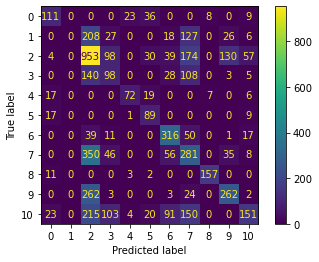

In [18]:
# all numric features 
dt_mod = DecisionTreeClassifier(criterion='gini',max_depth=9, max_leaf_nodes=64, random_state=123)
dt_fit = dt_mod.fit(X_train, y_train)
y_pred = dt_fit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100) 
conf_matrix = confusion_matrix(y_test, y_pred)
con_vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
con_vis.plot()


2. Using the selected features 

Using Features Selection >> Features Importance Plot 

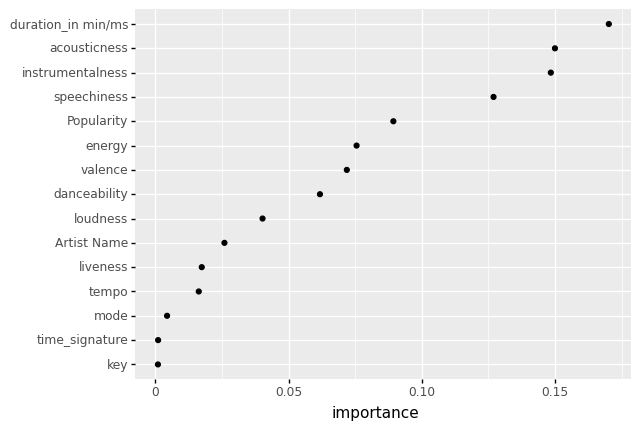

<ggplot: (8781636017924)>

In [19]:
dt_mod1 = results.best_estimator_
df_mod1_fit = dt_mod1.fit(X_train, y_train)
vi = pd.DataFrame({'feature': X_train.columns,
                   'importance': df_mod1_fit.feature_importances_})
top_20_features = vi.nlargest(20, 'importance')
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))


Accuracy: 42.89683274680496


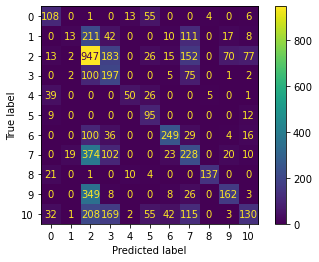

In [21]:
# using the highest importance features 
dt_mod = DecisionTreeClassifier(criterion='gini',max_depth=9, max_leaf_nodes=63, random_state=123)
dt_fit = dt_mod.fit(X_train[['duration_in min/ms','acousticness','instrumentalness','speechiness','Popularity']], y_train)
y_pred = dt_fit.predict(X_test[['duration_in min/ms','acousticness','instrumentalness','speechiness','Popularity']])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

conf_matrix = confusion_matrix(y_test, y_pred)
con_vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
con_vis.plot()


### Conclusion 

<table>
<tr>
<th> Model </th>
<th> Accuracy</th>
</tr>

<tr>
<td>Decision Tree </td>
<td>37%</td>
</tr>

<tr>
<td>Randon Forest</td>
<td>51%</td>
</tr>

<tr>
<td>KNN </td>
<td>42%</td>
</tr>

<tr>
<td>Logustic Regression</td>
<td>49%</td>
</tr>

</table>